Websites to open:

set_index documentation:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

Penguins data:
https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

Box plots:
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html

# Basic plotting
Using the `plot()` method of a `pandas.DataFrame` to create exploratory graphs from tabular data. 

## Check-in
Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

<Axes: title={'center': 'Bird species registered during spring at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

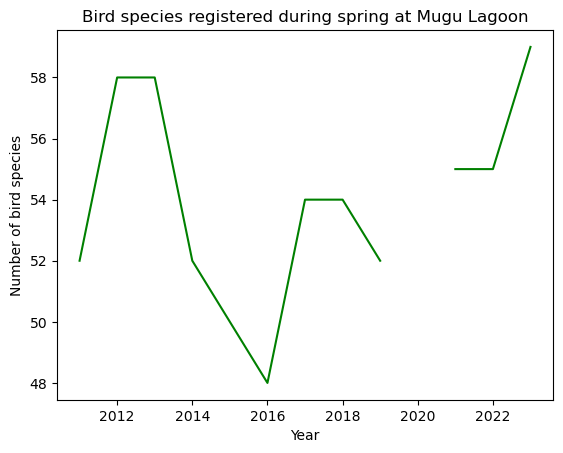

In [2]:
import pandas as pd

# Read in file
df = pd.read_csv('lesson-3-pandas-subsetting/data/wetlands_seasonal_bird_diversity.csv')

df.plot(x='year', 
        y='MUL_spring',
        title='Bird species registered during spring at Mugu Lagoon',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

In [11]:
df.loc[df['MUL_spring'].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


To **update the index** of `df` we use the `set_index()` method.
General syntax:

```python
df.set_index('column_name')
```
where `column_name` is the name of the column in the data frame `df` we want to use as new index.


This operation does not happen in-place. 

- A funciton **acting in-place** means that our original data frame is modified. 
- If the function **does not act in-place**, a new data frame is created and the original is not modified. 

To update our `df` data frame we could do an **explicit assignment** to reassign the output of `set_index()` to `df`:

```python
df = df.set_index('column_name')
```

or use the optional `inplace` parameter:

```python
df.set_index('column_name', inplace=True)
```

## Avoid using the `inplace=True` argument, favor explicit variable assignments
*Show in_place parameter in pandas documentation*

*You will often see the `inplace` parameter in methods for `pandas.DataFrames`. The best practice is to avoid `inplace=True` for better readability and maintainable code. Explicitly assigning the result to a new variable or the same variable makes it clear that an operation has occurred.*

Example:

In [12]:
# Update index to be the year column
df = df.set_index('year')
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: xlabel='year'>

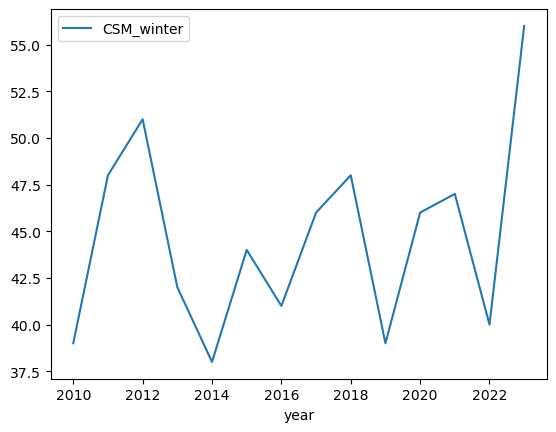

In [13]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

 Reset the index to be the numbering of the rows:

In [14]:
df = df.reset_index()
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


## Check-in
1. Without running the code, give a step-by-step breakdown of what this code is doing:
```python
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

2. Is this code modifying the data frame `df`? Why or why not?

3. Run the code and examine the graph. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites? 
<!--The different sites have very different sizes and the surveys show the total number of birds identified, not the number of birds relative to the extent. -->

<Axes: xlabel='year'>

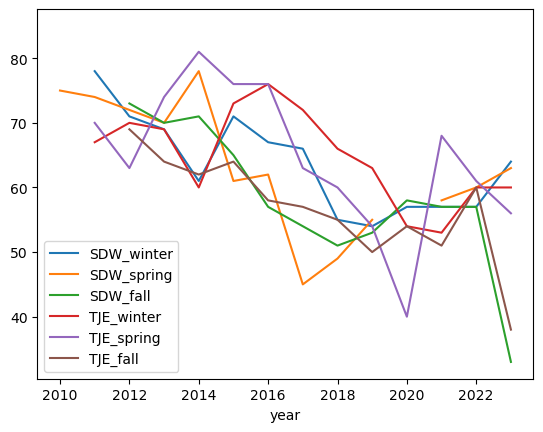

In [15]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()


## Method chaining
The code used in the check-in

```python
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

is an example of **method chaining**. Each method in the chain returns an object, allowing the next method to be called directly on the result. Great technique to make code concise and readable. 

*Chaining methods can result in lines of code that are too long and hard to read.* 
Break up chains of methods by using parenthesis:

```python
(df.set_index('year')
  .loc[:,'SDW_winter':'TJE_fall']
  .plot()
)
```
Notice that **the period `.` in the method chianing acts in the same way as the R pipe operator (`%>%` or `|>`)**. 

*The syntax of one method per line is similar to what is used in the tidyverse, except that the pipe is used at the end of the line while the period is used at the beginning of the line.*

An alternative to the previous code chaining could have been:
```python
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()
```

While this accomplishes the same output, several variables are created along the way and it can be difficult to keep track of what is what.  

However, if you’re not familiar with the methods, it's better to apply them individually and review the results after each step!


## About the data

We will use the  Palmer Penguins dataset. *developed by Drs. Allison Horst, Alison Hill and Kristen Gorman.* 
Data about size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

## Data exploration

*The data is usually accessed through the `palmerpenguins` R data package @palmerpenguins.* 

In [16]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [17]:
# Check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [18]:
# Simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Subset the dataframe to get information about a particular column or groups of columns:

In [19]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [20]:
# Get unique values in species column
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [21]:
# Number of values per unique value in species column
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## `kind` argument in `plot()`

`plot()` method creates a line plot by default.
By changing the value of the `kind` parameter we can create different kinds of plots. 
*Notice the default value of `kind` is `'line'`.*

*Let's change the `kind` parameter to create some different plots.*

## Scatter plots
Visualy compare the flipper length against the body mass using a scatterplot: 

In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g')

Further customize the graph:

In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

## Bar plots

Create bar plots of setting `kind='bar'` in `plot()`.

For example, let's say we want to get data about the 10 penguins with lowest body mass. 
First, select this data using the `nsmallest()` method for series:

In [24]:
smallest = penguins.body_mass_g.nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [23]:
penguins.body_mass_g.nsmallest(10)

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

We can then plot this data as a bar plot

<Axes: >

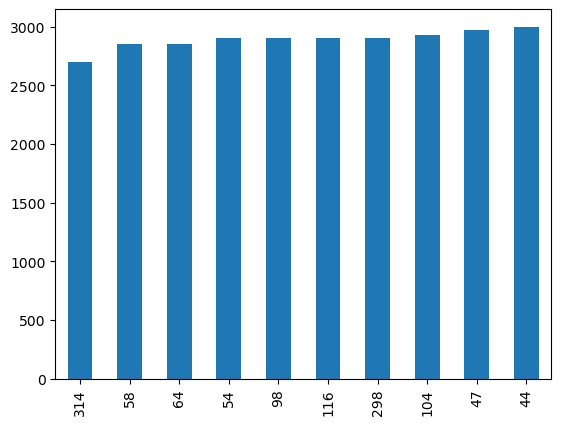

In [25]:
smallest.plot(kind='bar')

<!--
If we wanted to look at other data for these smallest penguins we can use the index of the `smallest` `pandas.Series` to select those rows in the original `penguins` data frame using `loc`:
-->
To look at other data for these smallest penguins we can use a different call to `nsmallest()`.

In [26]:
penguins.nsmallest(10, 'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


## Histograms

Create a histogram setting `kind='hist'` in `plot()`. 

<Axes: ylabel='Frequency'>

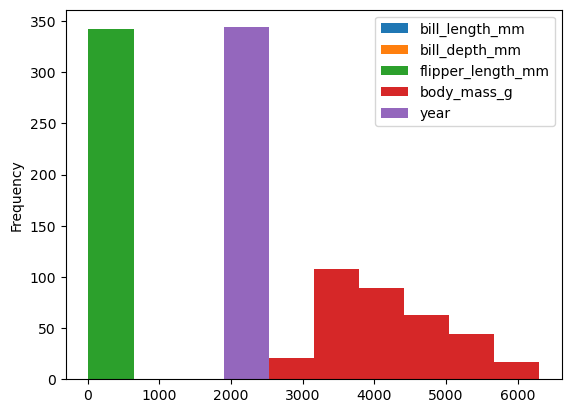

In [27]:
# Using plot without subsetting data - a mess again
penguins.plot(kind='hist')

To gain actual information, let's subset the data before plotting it. For example, suppose we want to do a preliminary graph for the distribution of flipper length. We could do it in this way:

<Axes: title={'center': 'Penguin flipper lengths'}, xlabel='Flipper length (mm)', ylabel='Frequency'>

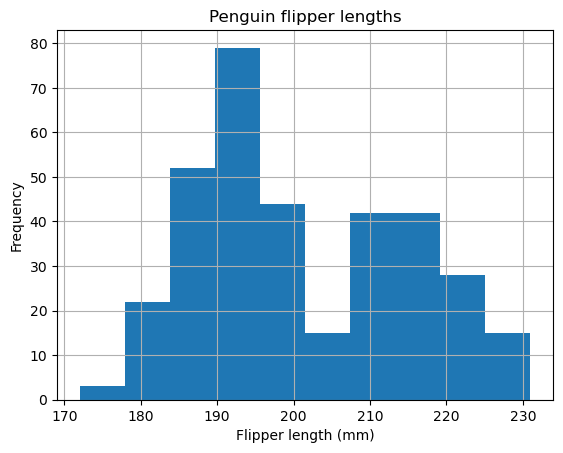

In [28]:
# Distribution of flipper length measurements
# First select data, then plot
penguins['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

## Check-in
1. Select the `bill_length_mm` and `bill_depth_mm` columns in the `penguins` dataframe and then update the kind parameter to `box` to make boxplots of the bill length and bill depth.

<Axes: >

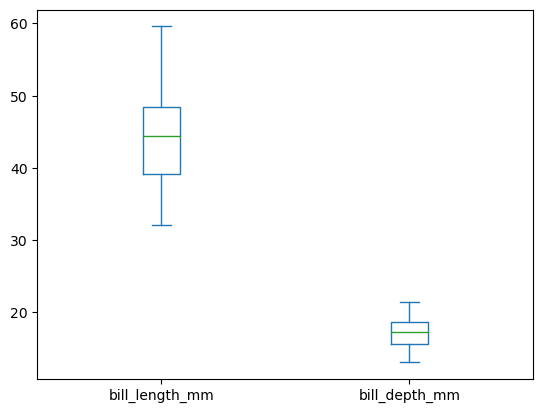

In [29]:
penguins[['bill_length_mm','bill_depth_mm']].plot(kind='box')

2. Create a simple histogram of the flipper length of female gentoo penguins.

<Axes: ylabel='Frequency'>

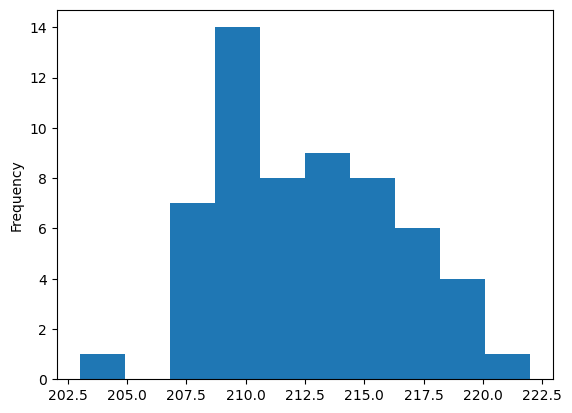

In [35]:
penguins.loc[(penguins.species == 'Gentoo') & (penguins.sex == 'female'), 'flipper_length_mm'].plot(kind='hist')